


#  Analytics Academy of Data Corner

### Classification Algorithms




Name: Camila Gomes Vilaca
Submission Date:19/07/2022

# --------------- Support Vector Machine (SVM) -----------------

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### About the dataset


Data were extracted from images that were taken from genuine and forged banknote-like specimens. We plan to build a predictive model using SVM to recognize the genuine and forged banknotes.

The detailed information about the data is available at the following link:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication



In [4]:
bankdata = pd.read_csv(f"C:/Users/gabri/Downloads/bill_authentication.csv")


In [5]:
bankdata.shape


(1372, 5)

In [6]:
bankdata.head(10)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


### Identifying the features (X) and target variable (Y)

In [7]:
X = bankdata.drop('Class', axis=1) #IVS
y = bankdata['Class'] #DV

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) #70% for cleaning and 30% for test


## Buiding SVM Model

In [18]:
from sklearn.svm import SVC


In [19]:

svclassifier = SVC(kernel='linear')

svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
# making the prediction
y_pred = svclassifier.predict(X_test)


In [21]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[225,   1],
       [  2, 184]], dtype=int64)

In [22]:
# --- Visualizing Confusion Matrix using Heatmap

In [23]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

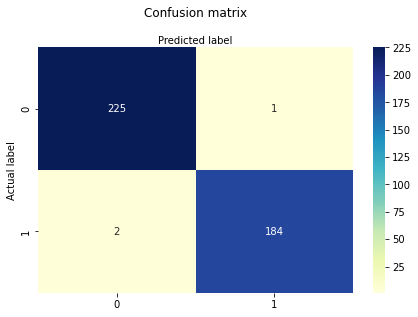

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9927184466019418
Precision: 0.9945945945945946
Recall: 0.989247311827957


# Lab Activity

Apply the SVM Model on the "diabetes.csv" dataset and compare the performance of the SVM model with the Decision Trees approach

In [ ]:
#--- write your code here

In [56]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

diabetes = pd.read_csv(f"C:/Users/gabri/Downloads/Diabetes (1).csv",  header=None, names=col_names)

In [57]:
diabetes.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [68]:
X = diabetes.drop('label', axis=1) #IVS
y = diabetes['label'] #DV

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) #70% for cleaning and 30% for test


In [70]:
svclassifier = SVC(kernel='linear')

svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
y_pred = svclassifier.predict(X_test)

In [72]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[126,  18],
       [ 37,  50]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

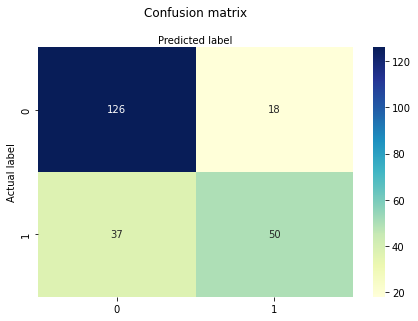

In [73]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7619047619047619


In [77]:
# Build confusion metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[126,  18],
       [ 37,  50]], dtype=int64)

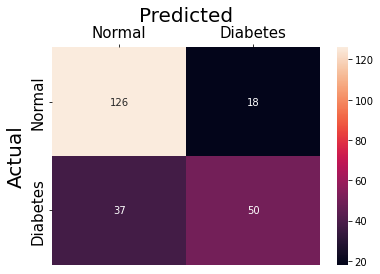

In [78]:
# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels(['Normal', 'Diabetes'], fontsize = 15)
plt.show()

 # --------------- SVM on iris dataset (classes with 3 values) --------------------

In [79]:
dataset2 = pd.read_csv(f"C:/Users/gabri/Downloads/iris.csv")

In [80]:
dataset2.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Lab Activity

Apply the SVM Model on the "iris.csv" dataset and build teh clasiffication model with 3 values

In [ ]:
# write your code here

In [81]:
X = dataset2.drop('Species', axis=1) #IVS
y = dataset2['Species'] #DV

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) #70% for cleaning and 30% for test

In [83]:
svclassifier = SVC(kernel='poly')

svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [84]:
y_pred = svclassifier.predict(X_test)

In [85]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18,  0,  0],
       [ 3, 15,  0],
       [ 0,  0,  9]], dtype=int64)

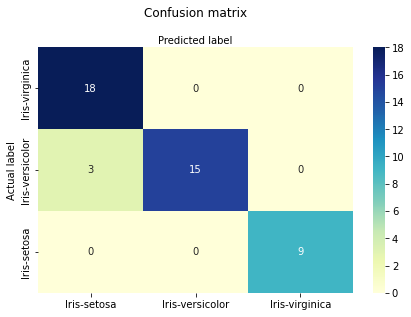

In [97]:
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']); ax.yaxis.set_ticklabels(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']);

In [87]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


# ------------- Random Forest --------------

Diabetes dataset

In [98]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

dataset = pd.read_csv(f"C:/Users/gabri/Downloads/Diabetes (1).csv",  header=None, names=col_names)

In [99]:
#split dataset in features and target variable

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = dataset[feature_cols] # Features
y = dataset.label # Target variable

In [100]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [101]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a  Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [102]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.78125


# Lab Activity

Consider the "MobilePrice.csv" dataset.

DV: 'price_range'

Build the following three classification models to predict the DV:

* Decition Tree (clf1)
* SVM (clf2)
* Random Forest (clf3)


Compare the accuracy of the developed models



In [128]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [129]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus

In [130]:
import sys
!conda install --yes --prefix {sys.prefix} graphviz

Solving environment: ...working... done

# All requested packages already installed.



In [131]:
!pip install six

In [110]:
price = pd.read_csv(f"C:/Users/gabri/Downloads/MobilePrice.csv")

In [153]:
price.shape

(2000, 21)

In [154]:
price.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [155]:
X = price.drop('price_range', axis=1) #IVS
y = price['price_range'] #DV

In [156]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [157]:
# 1 Create Decision Tree classifer object

clf = DecisionTreeClassifier()

In [158]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [159]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [160]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8616666666666667


In [161]:
# Build confusion metrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[118,  17,   0,   0],
       [  8, 130,  11,   0],
       [  0,  19, 133,  16],
       [  0,   0,  12, 136]], dtype=int64)

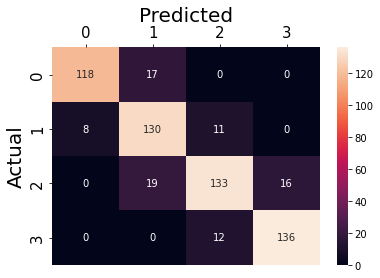

In [162]:
# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels([0, 1, 2, 3], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('Actual', fontsize=20)
ax.yaxis.set_ticklabels([0, 1, 2, 3], fontsize = 15)
plt.show()

In [134]:
#2 


In [146]:

svclassifier = SVC(kernel='linear')

svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [147]:
y_pred = svclassifier.predict(X_test)

In [148]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[133,   2,   0,   0],
       [  2, 144,   3,   0],
       [  0,   6, 157,   5],
       [  0,   0,   3, 145]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

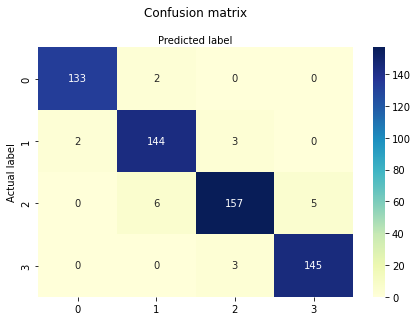

In [149]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.965


In [141]:
3#

3

In [151]:
#Create a  Classifier
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [152]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.855
